Loading necessary libraries and recommendation models/utils

In [1]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"]="0"
sys.path.insert(0,"/home/langenhagen/Masterthesis/Masterarbeit/recommenders")

import numpy as np
#import tensorflow as tf
import pandas as pd

from recommenders.models.newsrec.models.nrms import NRMSModel

import wandb
from recommenders.models.deeprec.deeprec_utils import \
    download_deeprec_resources
from recommenders.models.newsrec.io.mind_iterator import MINDIterator
from recommenders.models.newsrec.newsrec_utils import (get_mind_data_set,
                                               prepare_hparams)

2022-12-14 03:13:49.860261: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Loading the trained models from '/home/langenhagen/Masterthesis/Masterarbeit/Save_models/' . Available models are for history sizes 1,10,25,50 and 100 for NRMS

In [2]:
from recommenders_tests import load_small
from loading_utils import from_idx_to_UID,from_idx_to_words

train_news_file,train_behaviors_file,valid_news_file,valid_behaviors_file,wordEmb_file,userDict_file,wordDict_file,vertDict_file,subvertDict_file = load_small()
yaml_file = os.path.join("/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small", "utils", r'nrms.yaml')

test_behaviors_file="/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/test/behaviors.tsv"

hparams= prepare_hparams(yaml_file, 
                        wordEmb_file=wordEmb_file,
                        wordDict_file=wordDict_file, 
                        userDict_file=userDict_file,
                        vertDict_file=vertDict_file, 
                        subvertDict_file=subvertDict_file,
                        batch_size=32,
                        his_size = 100,
                        epochs=2)

iterator = MINDIterator
nrms = NRMSModel(hparams,iterator,42)


train_news_file = "/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/test/news.tsv"
train_behaviors_file = "/home/langenhagen/Masterthesis/Masterarbeit/Dataset_small/Users_with_n_behaviors/behaviors.tsv"

nrms, results = nrms.fit(train_news_file, train_behaviors_file, valid_news_file, valid_behaviors_file, valid_news_file,track_wand=False,results_as_list = True)

# nrms.model.load_weights(f"/home/langenhagen/Masterthesis/Masterarbeit/Save_models/NRMS_weights_hist_25/")

2022-12-14 03:14:29.415944: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 03:14:29.417526: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-14 03:14:29.419839: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-14 03:14:29.439058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-14 03:14:29.439794: I tensorflow/stream_executor/platform/defa

2022-12-14 03:14:36.049606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-12-14 03:14:36.049996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2022-12-14 03:14:36.050010: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2022-12-14 03:14:36.054050: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 9086 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1)
2022-12-14 03:14:36.160158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2022-12-14 03:14:36.161642: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099965000 Hz


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-12-14 03:14:36.366476: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-14 03:14:36.367809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-14 03:14:36.367869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-14 03:14:36.367915: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-14 03:14:36.367954: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-12-14 03:14:36.367981: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuff

Input shape: (None, None, 400)
Attention weights: Tensor("att_layer2/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("time_distributed/news_encoder/att_layer2/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("time_distributed/att_layer2/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("att_layer2_1/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder/time_distributed/news_encoder/att_layer2/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder/time_distributed/att_layer2/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input shape: (None, None, 400)
Attention weights: Tensor("user_encoder/att_layer2_1/ExpandDims:0", shape=(None, None, 1), dtype=float32)
Input sha

0it [00:00, ?it/s]2022-12-14 03:15:05.158998: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
7868it [53:35,  2.45it/s]
0it [00:00, ?it/s]/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
1326it [00:09, 135.93it/s]
2286it [03:30, 10.86it/s]
73152it [01:15, 963.33it/s] 
1326it [00:07, 171.06it/s]
2286it [03:21, 11.32it/s]
73152it [00:31, 2335.42it/s]


at epoch 1
train info: logloss loss:1.3755367014786284
eval info: group_auc:0.646, mean_mrr:0.307, ndcg@10:0.4, ndcg@5:0.3367
test info: group_auc:0.646, mean_mrr:0.307, ndcg@10:0.4, ndcg@5:0.3367
at epoch 1 , train time: 3215.7 eval time: 751.4


7868it [52:56,  2.48it/s]
1326it [00:07, 188.71it/s]
2286it [03:19, 11.45it/s]
73152it [00:31, 2315.48it/s]
1326it [00:07, 185.99it/s]
2286it [03:20, 11.42it/s]
73152it [00:22, 3205.36it/s]


at epoch 2
train info: logloss loss:1.278173703520384
eval info: group_auc:0.6556, mean_mrr:0.3129, ndcg@10:0.4073, ndcg@5:0.3438
test info: group_auc:0.6556, mean_mrr:0.3129, ndcg@10:0.4073, ndcg@5:0.3438
at epoch 2 , train time: 3176.4 eval time: 694.9


In [3]:
nrms.save_weights('/home/langenhagen/Masterthesis/Masterarbeit/Save_models/content_model_weights', save_format='tf')

AttributeError: 'NRMSModel' object has no attribute 'save_weights'

In [4]:
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
K = tf.keras.backend

# from model_utils import get_attention_nrms ,visualize_attention

class CharVal(object):
    def __init__(self, char, val):
        self.char = char
        self.val = val

    def __str__(self):
        return str(self.char) # TODO funktioniert noch nicht so wie sie soll sie print(char_df)

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def color_charvals(s):
    r = 255-int(s.val*255)
    print(r)
    color = rgb_to_hex((255, r, r))
    return 'background-color: %s' % color


def get_attention_nrms(model : NRMSModel,user_input):

    # Input runs to the two first layers
    inputs = model.userencoder.layers[0](user_input)
    inputs = model.userencoder.layers[1](inputs)

    # Weights for attention mechanism
    w_ = model.userencoder.layers[1].weights[4]
    b_ = model.userencoder.layers[1].weights[5]
    q_ = model.userencoder.layers[1].weights[6]

    # tanh(w.x + b) . q
    attention = K.tanh(K.dot(inputs, w_) + b_)
    attention = K.dot(attention, q_)

    attention = K.squeeze(attention, axis=2)

    # Mask out every padding news titel e.g. User has history size 12 and max history size is 100 than the first 88 values are masked out
    assert len(user_input.shape) == 3 , print("User input has to be of shape (batchsize, max_hist_size, max_title_size)")
    mask = np.count_nonzero(user_input != 0,axis=2)
    mask = mask != 0
    if mask is None:
            attention = K.exp(attention)
    else:
            attention = K.exp(attention) * K.cast(mask, dtype="float32")
    
    # Attention weights are basically probabilies 
    attention = K.exp(attention)

    attention_weight = attention / (
        K.sum(attention, axis=-1, keepdims=True) + K.epsilon()
    )
    
    attention_weight = K.expand_dims(attention_weight)

    return attention,attention_weight

def visualize_attention(scores_mat : np.array):
    fig = plt.figure(figsize=(20, 20))

    # print(scores_mat.shape)
    # scores_mat = np.expand_dims(scores_mat,axis=1)
    # scores_mat = np.expand_dims(scores_mat,axis=1)
    # print(scores_mat.shape)
    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(scores_mat)))
        ax.set_yticks(range(len(scores_mat)))

        ax.set_xticklabels(scores_mat, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(scores_mat, fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(scores_mat, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()


for batch_data_input in tqdm(
            nrms.test_iterator.load_user_from_file(valid_news_file, valid_behaviors_file)
        ):
        with tf.compat.v1.Session() as sess:

            # This makes it possible to see tensor vectors
            init = tf.compat.v1.global_variables_initializer()
            sess.run(init)
            user_input = nrms._get_user_feature_from_iter(batch_data_input)
            
            # 1 x his_size x 30 
            # batchsize x history x titlelenght
            # Dim 1 : Batch
            # Dim 2 : News aus der History
            # Dim 3 : Word IDs welche Titel repräsentieren

            #from_idx_to_words(nrms,user_input[0][99])

            # Show the history size of each element in batch
            # for b in range(user_input.shape[0]):
            #     print(f"Actual history length for batch {b}: {np.count_nonzero(np.count_nonzero(user_input[b] != 0,axis=1))}")
                
            
            attention, att_weight = get_attention_nrms(nrms,user_input)
            
            att_weight = sess.run(att_weight)

            print(att_weight.shape)
            # visualize_attention(att_weight)

            # if you are using batches the outputs will be in batches
            # get exact attentions of chars
            an_attention_output = att_weight

            sorted_news = np.argsort(np.sum(att_weight[:,:,0],axis=0))[::-1]
            sorted_atts = np.sort(np.sum(att_weight[:,:,0],axis=0))[::-1]

            print(sorted_atts)
            print(sorted_news)
            dict_ = dict(zip(sorted_news,sorted_atts))

            # Print the sorted attention weights
            # sns.histplot(dict_,bins=len(set(sorted_atts)))

            # sns.barplot(dict_)
            # for i in range(att_weight.shape[0]):
            #     print(f"Max : {round(np.max(att_weight[i]), 4)} vs Min : {round(np.min(att_weight[i]), 4)}")
        break
        


0it [00:00, ?it/s]2022-12-14 08:00:11.500731: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-14 08:00:11.501996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-14 08:00:11.502166: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-14 08:00:11.502300: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-14 08:00:11.502329: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-12-14 08:00:11.502513: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynam

Input shape: (3200, 30, 400)
Attention weights: Tensor("time_distributed_2/news_encoder/att_layer2/ExpandDims:0", shape=(3200, 30, 1), dtype=float32)
Input shape: (3200, 30, 400)
Attention weights: Tensor("time_distributed_2/att_layer2/ExpandDims:0", shape=(3200, 30, 1), dtype=float32)


0it [00:01, ?it/s]

(32, 100, 1)
[0.65395254 0.6535249  0.6532822  0.6074023  0.59155715 0.5609017
 0.54600954 0.5452977  0.5444304  0.502486   0.47352266 0.46001142
 0.43274838 0.41938716 0.41894004 0.4068747  0.406801   0.39452037
 0.39340925 0.36960188 0.3686639  0.36859894 0.36819673 0.36775112
 0.35688594 0.35658365 0.33391526 0.32245907 0.31144416 0.31141406
 0.31138897 0.31120366 0.31096482 0.30053154 0.3004723  0.3002698
 0.30012134 0.2902114  0.29001504 0.28006765 0.2800529  0.27071264
 0.27065024 0.27060682 0.2704887  0.27046636 0.27043697 0.27041683
 0.27041304 0.27032012 0.27031517 0.27029234 0.27025616 0.27019778
 0.27015626 0.2618309  0.26172754 0.26170605 0.26166394 0.25345045
 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045
 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045
 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045
 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045 0.25345045
 0.25345045 0.25345045 0.25345045 0.25345045 0.2534

/home/langenhagen/miniconda3/envs/tf_newsrec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


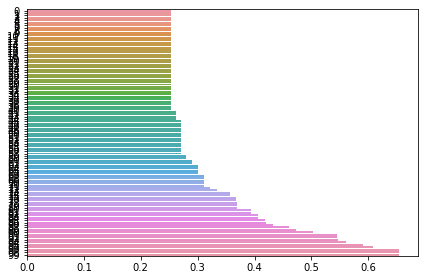

In [5]:
import matplotlib.pyplot as plt
ax = sns.barplot(sorted_atts[::-1],sorted_news[::-1],orient='h')


plt.tight_layout()
plt.show()